# Bohemian Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Prerequisites

In [2]:
NUM_SAMPLES = 50

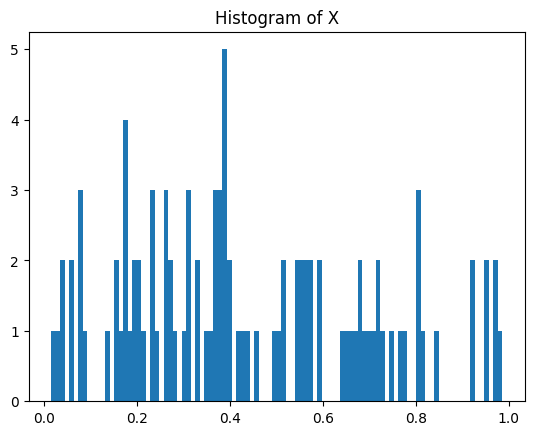

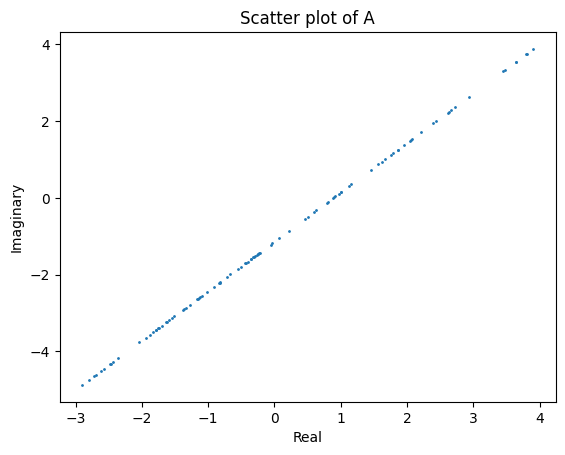

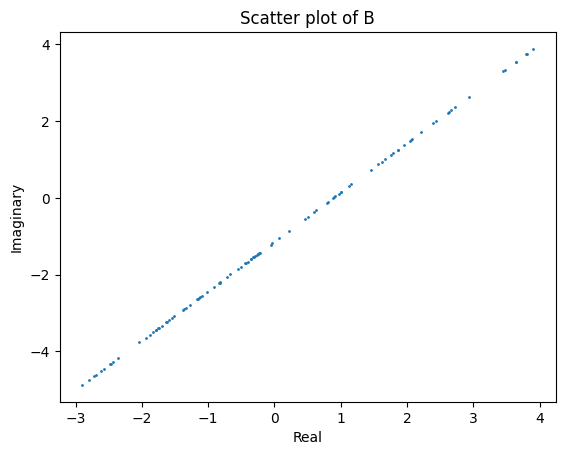

In [3]:
# X is a continuous uniform random variable
X = np.random.uniform(0, 1, NUM_SAMPLES)

# plot the histogram of X
plt.title('Histogram of X')
plt.hist(X, bins=100)
plt.show()

# A and B are independently sampled from (7 + 9j) * X - 3 - 5j
A = (7 + 9j) * X - (3 + 5j)
B = (7 + 9j) * X - (3 + 5j)

plt.title('Scatter plot of A')
plt.scatter(A.real, A.imag, s=1)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

plt.title('Scatter plot of B')
plt.scatter(B.real, B.imag, s=1)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## Bohemian Matrix

Bohemian matrix is:
$$
  [0, 1, 1, 1, A], \\
  [0, 0, 0, B, 0], \\
  [1, 1, 1, 0, 0], \\
  [0, 1, 1, 1, 1], \\
  [0, 1, 0, 0, 0] \\
$$
where $A$ and $B$ are calculated from above.

In [4]:
def color_map(a, b):
    # return a unique value for the color of scatter points with this combination of a and b
    return a * 100 + b


def plot_bohemian(a, b):
    bohemian = np.matrix(
        [
            [0, 1, 1, 1, a],
            [0, 0, 0, b, 0],
            [1, 1, 1, 0, 0],
            [0, 1, 1, 1, 1],
            [0, 1, 0, 0, 0],
        ]
    )
    # Calculate the eigenvalues of the Bohemian matrix
    eigenvalues = np.linalg.eigvals(bohemian)
    # Plot the eigenvalues
    plt.scatter(
        eigenvalues.real,
        eigenvalues.imag,
        s=0.5,
        color=plt.cm.jet(color_map(a.real, b.real)),
    )


def render_bohemian(plot_each_step=False):
    pbar = tqdm(A) if not plot_each_step else A
    for a in pbar:
        for b in B:
            plot_bohemian(a, b)
        if plot_each_step:
            plt.title(f"Eigenvalues of Bohemian matrix with a = {a}")
            plt.xlabel("Real")
            plt.ylabel("Imaginary")
            plt.show()
    if not plot_each_step:
        plt.title(f"Eigenvalues of Bohemian matrix")
        plt.xlabel("Real")
        plt.ylabel("Imaginary")
        plt.savefig("bohemian.png")
        plt.show()

100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


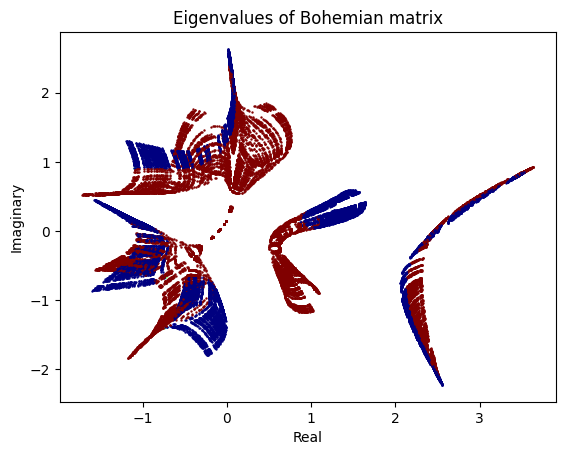

In [5]:
render_bohemian()

## Visualize eigen values of each matrix seperately

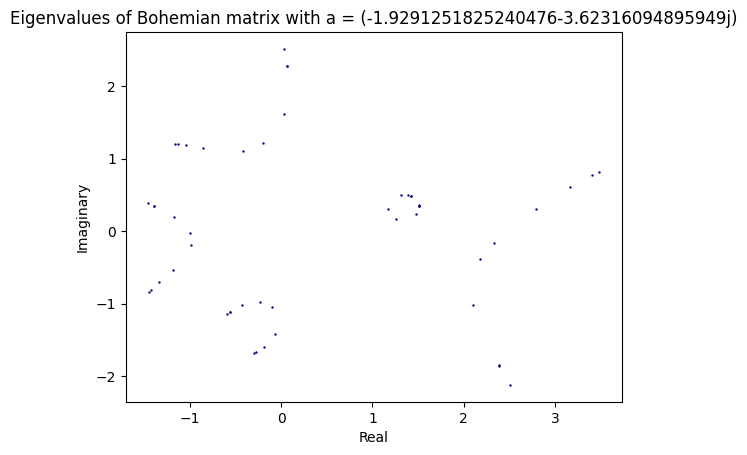

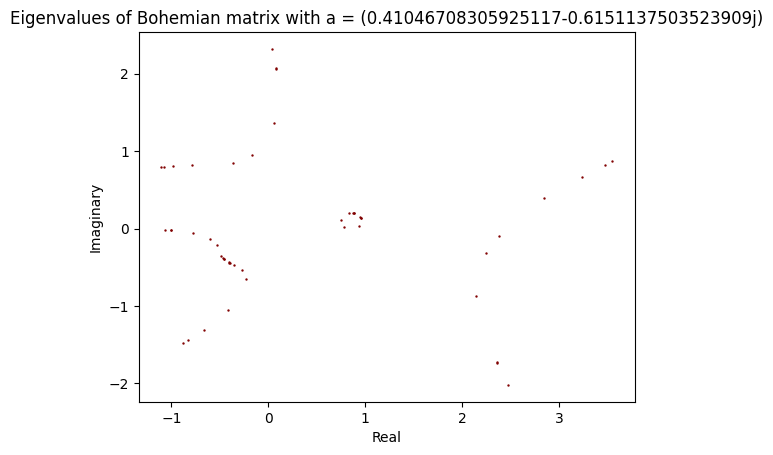

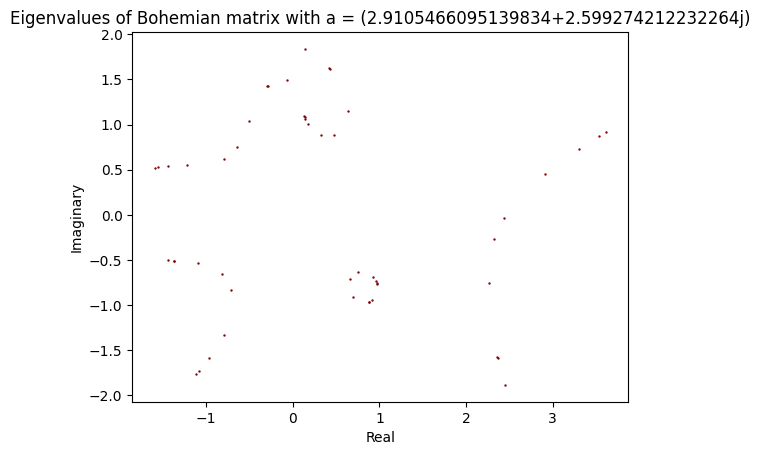

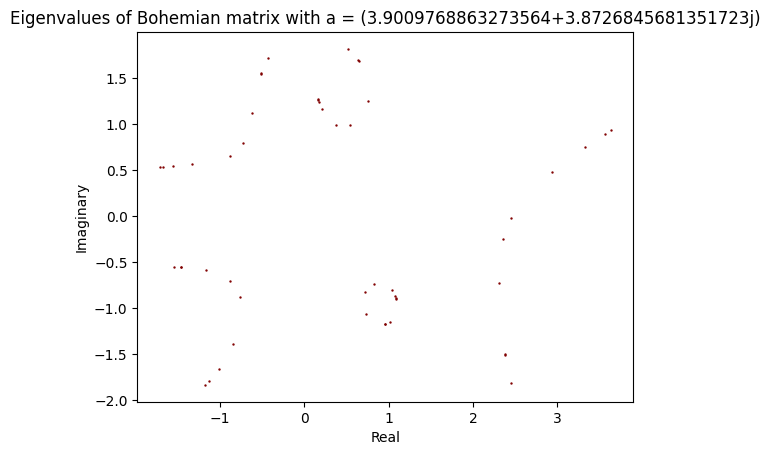

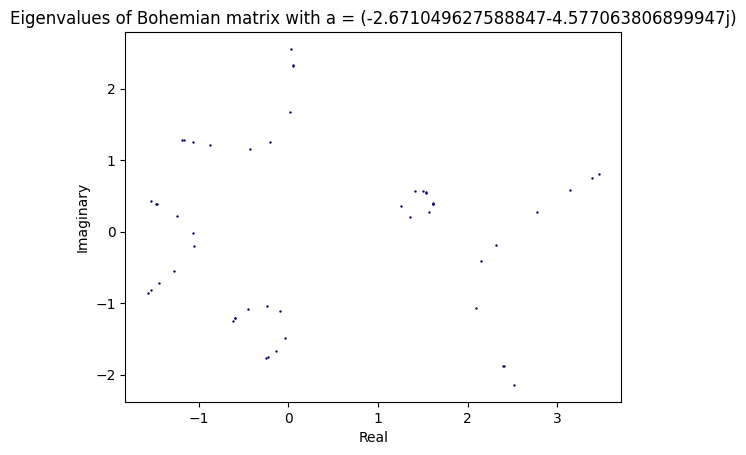

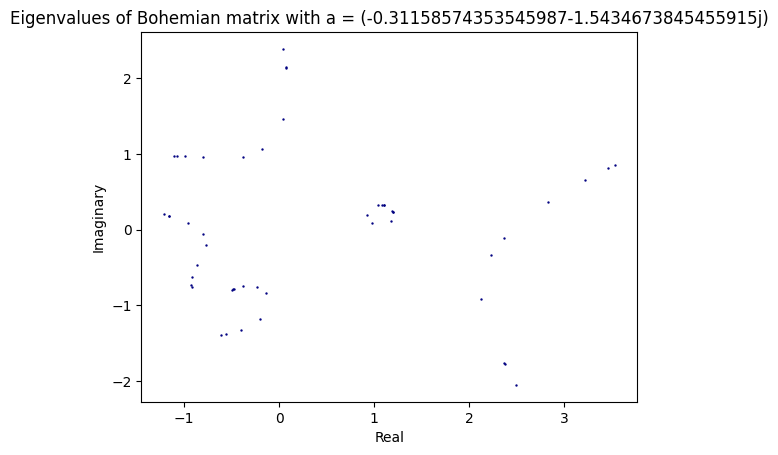

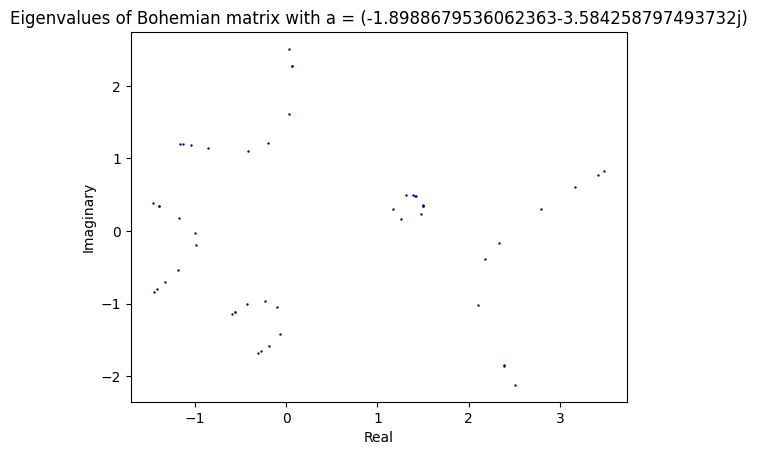

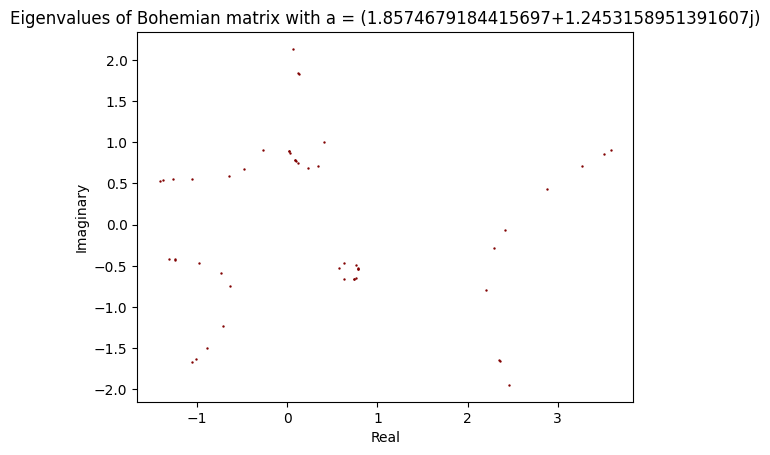

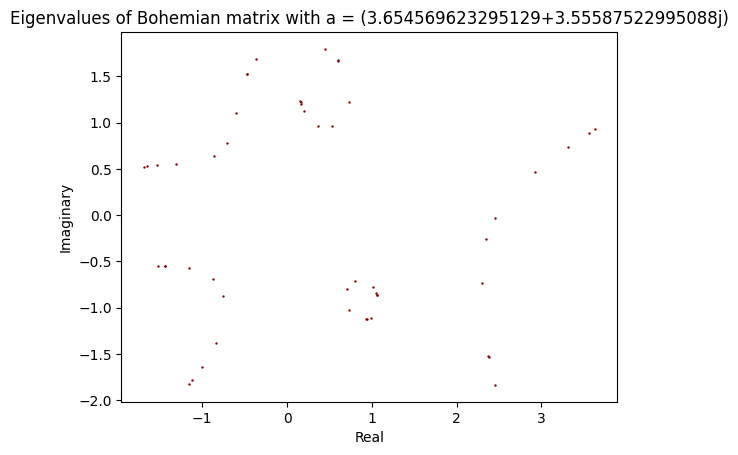

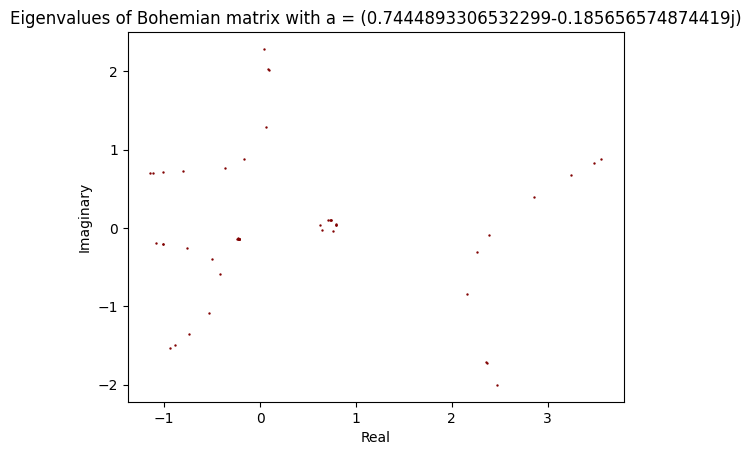

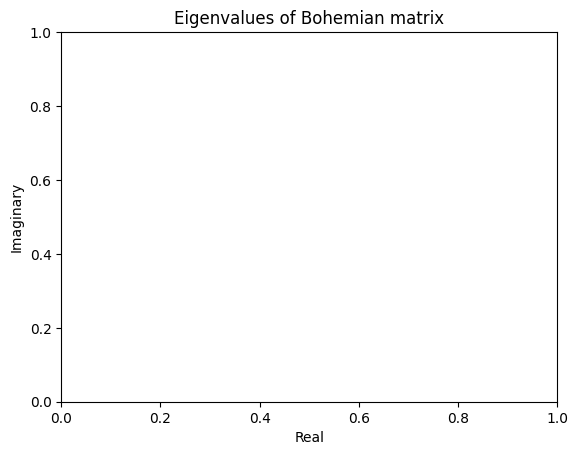

In [20]:
NUM_SAMPLES = 10

X = np.random.uniform(0, 1, NUM_SAMPLES)
# A and B are independently sampled from (7 + 9j) * X - 3 - 5j
A = (7 + 9j) * X - (3 + 5j)
B = (7 + 9j) * X - (3 + 5j)

render_bohemian(plot_each_step=True)